# VinBigData Chest X-ray Abnormalities Detection
Automatically localize and classify thoracic abnormalities from chest radiographs

#### The aim of this notebook is to explore the histogram equalization technique and it's variant.

## Import libraries

In [ ]:
!pip install tensorflow_io

     |████████████████████████████████| 28.8 MB 412 kB/s 
     |████████████████████████████████| 2.4 MB 43.9 MB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pydicom
import torch
import torchvision.transforms as transforms

## Read DICOM images

In [ ]:
def read_dicom(path):
    # Read the DICOM file
    dicom = pydicom.dcmread(path)
    image = dicom.pixel_array

    # Convert to a numpy array of type float32
    image = image.astype(np.float32)

    # Convert to a PyTorch tensor
    image = torch.from_numpy(image)

    # Reshape if it's a single channel image
    if len(image.shape) == 2:
        image = image.unsqueeze(0)  # Add a channel dimension

    # Resize the image to 500x500
    resize_transform = transforms.Resize((500, 500))
    image = resize_transform(image)

    # Normalize the image
    image = image - torch.min(image)
    image = image / torch.max(image)
    image = image * 255.0

    # Convert to uint8
    image = image.to(torch.uint8)
    # Change shape from (1, 500, 500) to (500, 500, 1)
    image = image.squeeze(0).unsqueeze(2)
    return image

## Visualization

### Original

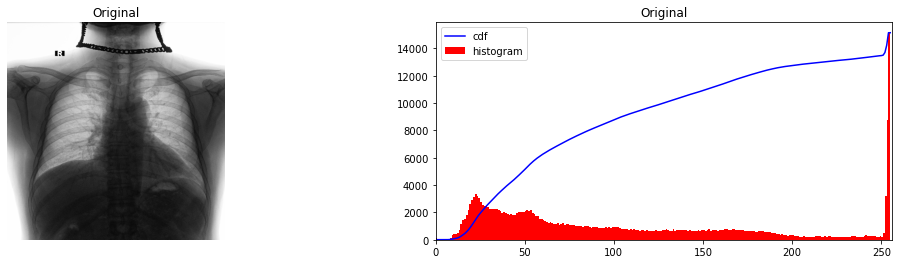

In [ ]:
fpath = "../input/vinbigdata-chest-xray-abnormalities-detection/train/000434271f63a053c4128a0ba6352c7f.dicom"
image = read_dicom(fpath)

plt.figure(figsize = (18, 4))

plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Original")
plt.imshow(image, cmap = "gray");

plt.subplot(1, 2, 2)
hist, bins = np.histogram(image.numpy().flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')

plt.hist(image.numpy().flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.title("Original")
plt.show();

### Histogram Equalization
This method usually increases the global contrast of images. This is done by redistributing pixel intensity.

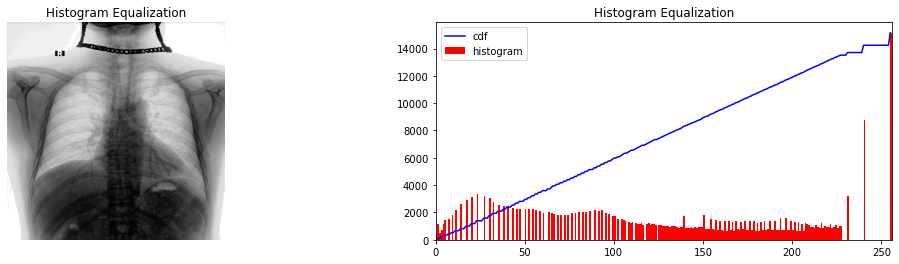

In [ ]:
plt.figure(figsize = (18, 4))

plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Histogram Equalization")

img_he = cv2.equalizeHist(image.numpy())

plt.imshow(img_he, cmap = "gray");

plt.subplot(1, 2, 2)
hist, bins = np.histogram(img_he.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')

plt.hist(img_he.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.title("Histogram Equalization")
plt.show();

A disadvantage of the method is that it is indiscriminate. It may increase the contrast of background noise.

### Contrast Limited Adaptive Histogram Equalization
Technique to improve the contrast of an image. It differs from ordinary histogram equalization in the respect that the adaptive method computes several histograms, each corresponding to a distinct section of the image, and uses them to redistribute the lightness values of the image. Additionally, it prevents over amplification of noise.

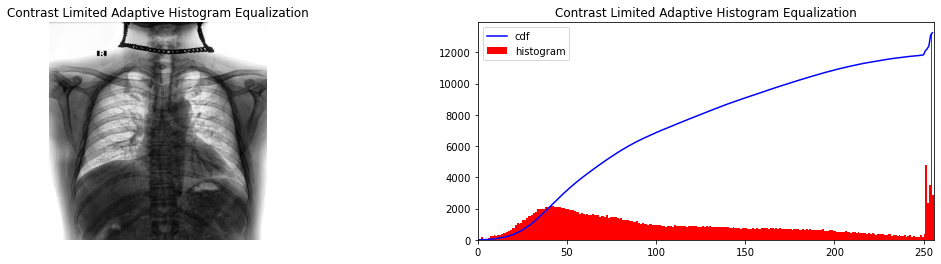

In [ ]:
plt.figure(figsize = (18, 4))

plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Contrast Limited Adaptive Histogram Equalization")

clahe = cv2.createCLAHE(
    clipLimit = 2.,
    tileGridSize = (10, 10)
)

img_clahe = clahe.apply(image.numpy())

plt.imshow(img_clahe, cmap = "gray");

plt.subplot(1, 2, 2)
hist, bins = np.histogram(img_clahe.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')

plt.hist(img_clahe.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.title("Contrast Limited Adaptive Histogram Equalization")
plt.show();

### Summary

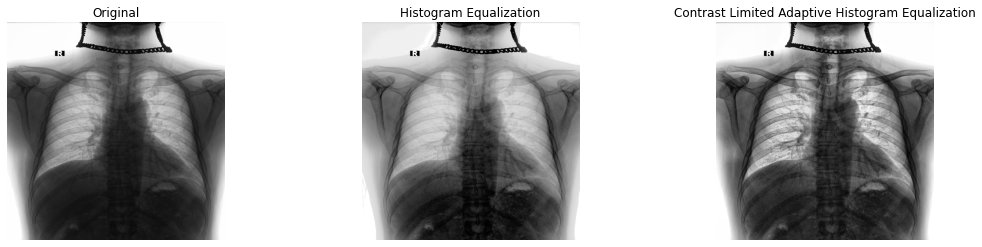

In [ ]:
plt.figure(figsize = (18, 4))

plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("Original")
plt.imshow(image, cmap = "gray");

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title("Histogram Equalization")
plt.imshow(img_he, cmap = "gray");

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title("Contrast Limited Adaptive Histogram Equalization")
plt.imshow(img_clahe, cmap = "gray");